In [126]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

members = ['Jennie','Jisoo','Lisa','Rose']
test_folder = 'test'
train_times = 15
test_times = 3
ix = 0
k_value=5 #change k to get highest accuracy
face_classify = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX

In [127]:
def distance(v1, v2):
    # Eucledian 
    dis = np.sqrt(((v1-v2)**2).sum())
    return dis

In [128]:
def knn(train, test, k=k_value): 
    dist = []
    
    for i in range(train.shape[0]):
        # Get the vector and label
        ix = train[i, :-1]
        iy = train[i, -1]
        # Compute the distance from test point
        d = distance(test, ix)
        dist.append([d, iy])
    # Sort based on distance and get top k
    dk = sorted(dist, key=lambda x: x[0])[:k]
    # Retrieve only the labels
    labels = np.array(dk)[:, -1]
    
    # Get frequencies of each label
    output = np.unique(labels, return_counts=True)
    # Find max frequency and corresponding label
    index = np.argmax(output[1])
    return output[0][index]

In [129]:
data = []
data_path = './face_data/'
for person in members:
    label = person
    print("\nTraining: ",person,"'s' images...\n")
    for i in range (0, train_times):
        path=('train/'+person+ '/Image ('+str(i+1)+').JPG') 
        print (path)
        images = cv2.imread(path)
        images = cv2.cvtColor(images ,cv2.COLOR_BGR2GRAY)
        faces = face_classify.detectMultiScale(images, 1.3, 5)
        for (x, y, w, h) in faces:
            offset = 10
            face_column = images[y-offset:y+h+offset,x-offset:x+w+offset]
            face_record = cv2.resize(face_column, (100,100))
            if ix % 10 == 0 and len(data) < 40:
                data.append(face_record)
    np_data = np.array(data)
    np.save(data_path+person,data)
print("\nTraining Complete!")


Training:  Jennie 's' images...

train/Jennie/Image (1).JPG
train/Jennie/Image (2).JPG
train/Jennie/Image (3).JPG
train/Jennie/Image (4).JPG
train/Jennie/Image (5).JPG
train/Jennie/Image (6).JPG
train/Jennie/Image (7).JPG
train/Jennie/Image (8).JPG
train/Jennie/Image (9).JPG
train/Jennie/Image (10).JPG
train/Jennie/Image (11).JPG
train/Jennie/Image (12).JPG
train/Jennie/Image (13).JPG
train/Jennie/Image (14).JPG
train/Jennie/Image (15).JPG

Training:  Jisoo 's' images...

train/Jisoo/Image (1).JPG
train/Jisoo/Image (2).JPG
train/Jisoo/Image (3).JPG
train/Jisoo/Image (4).JPG
train/Jisoo/Image (5).JPG
train/Jisoo/Image (6).JPG
train/Jisoo/Image (7).JPG
train/Jisoo/Image (8).JPG
train/Jisoo/Image (9).JPG
train/Jisoo/Image (10).JPG
train/Jisoo/Image (11).JPG
train/Jisoo/Image (12).JPG
train/Jisoo/Image (13).JPG
train/Jisoo/Image (14).JPG
train/Jisoo/Image (15).JPG

Training:  Lisa 's' images...

train/Lisa/Image (1).JPG
train/Lisa/Image (2).JPG
train/Lisa/Image (3).JPG
train/Lisa/Image (4

In [130]:
#jennie_image = np.load('Jennie.npy').reshape((jennie_image.shape[0], -1))
#jisoo_image = np.load('Jisoo.npy').reshape((jisoo_image.shape[0],-1))
#lisa_image = np.load('Lisa.npy').reshape((lisa_image.shape[0],-1))
#rose_image = np.load('Rose.npy').reshape((rose_image.shape[0],-1))

#data = np.concatenate((jennie_image,jisoo_image,lisa_image,rose_image),axis=0)
#labels = np.zeros((data.shape[0]))

#labels[40:80] = 1.0
#labels[80:] = 2.0

#names = {
#    0: 'Jennie',
#    1: 'Jisoo',
#    2: 'Lisa',
#    3: 'Rose'
#}

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

face_data = []
labels = []
names = {}
class_id = 0

for whole_data in os.listdir(data_path):
    if whole_data.endswith('.npy'):
        names[class_id] = whole_data[:-4]
        print("Loaded "+whole_data)
        data_item = np.load(data_path+whole_data)
        face_data.append(data_item)
        
        target = class_id*np.ones((data_item.shape[0],))
        class_id += 1
        labels.append(target)

face_dataset = np.concatenate(face_data,axis=0)
face_dataset_res = face_dataset.reshape(face_dataset.shape[0], -1)
face_labels = np.concatenate(labels,axis=0).reshape((-1,1))

print(face_dataset_res.shape)
print(face_labels.shape)

trainset = np.concatenate((face_dataset_res,face_labels),axis=1)
print(trainset.shape)

Loaded Jennie.npy
Loaded Jisoo.npy
Loaded Lisa.npy
Loaded Rose.npy
(117, 10000)
(117, 1)
(117, 10001)


In [131]:
test_data = []
accu_no=0

for test_person in members:
    test_label = test_person
    
    for i in range (0, test_times):
        test_path=('test/'+test_person+ '/Image ('+str(i+1)+').jpg') 
        print (test_path)
        test_images = cv2.imread(test_path)
        test_images = cv2.cvtColor(test_images ,cv2.COLOR_BGR2GRAY)
        test_faces = face_classify.detectMultiScale(test_images, 1.3, 5)
        for (x, y, w, h) in test_faces:
            offset = 10
            test_face_column = test_images[y-offset:y+h+offset,x-offset:x+w+offset]
            test_face_record = cv2.resize(test_face_column,(100,100))
            output_text = names[int(knn(trainset, test_face_record.flatten()))]
            
            print("Actual: ",test_person)
            print("Predict: ",output_text)
            
            cv2.putText(test_images, output_text, (x, y), font, 1, (255, 0,255), 4) 
            cv2.rectangle(test_images, (x, y), (x+w, y+h), (0, 0, 255), 4)
            cv2.imshow('Test_Images', test_images)
            #plt.imshow(test_images)
            
            if output_text == test_person:
                accu_no = accu_no + 1
                
accu_total = accu_no/(test_times*(len(members)))
print ("\nAccuracy: ", accu_no , " / ", test_times*(len(members)) , " = ", accu_total)
print( "Accuracy Percentage: ","%.2f" %(accu_total*100),"%")


test/Jennie/Image (1).jpg
Actual:  Jennie
Predict:  Jisoo
test/Jennie/Image (2).jpg
Actual:  Jennie
Predict:  Rose
test/Jennie/Image (3).jpg
Actual:  Jennie
Predict:  Jisoo
test/Jisoo/Image (1).jpg
Actual:  Jisoo
Predict:  Jisoo
test/Jisoo/Image (2).jpg
Actual:  Jisoo
Predict:  Lisa
test/Jisoo/Image (3).jpg
Actual:  Jisoo
Predict:  Jisoo
test/Lisa/Image (1).jpg
Actual:  Lisa
Predict:  Rose
test/Lisa/Image (2).jpg
test/Lisa/Image (3).jpg
test/Rose/Image (1).jpg
Actual:  Rose
Predict:  Jennie
test/Rose/Image (2).jpg
Actual:  Rose
Predict:  Rose
test/Rose/Image (3).jpg
Actual:  Rose
Predict:  Jisoo

Accuracy:  3  /  12  =  0.25
Accuracy Percentage:  25.00 %


In [123]:
#Importing KNN Classifier
#Use Sklearn KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(face_dataset_res, face_labels, random_state=0)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=13, p=2,weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.23333333333333334


C:\Users\USER\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [124]:
#import scikitplot as skplt
#plt.figure(figsize=(12,8))
#f,ax=plt.subplots(1,1,figsize=(12,12))
#sklearn.metrics.plot_confusion_matrix(rfc,y_test, y_pred)
#skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize='true',ax=ax)
#plt.show()

C:\Users\USER\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\ipykernel_laun

Text(0, 0.5, 'Testing Accuracy')

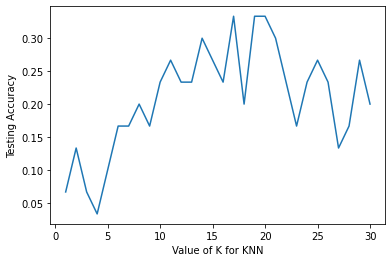

In [125]:
# try K=1 through K=30 and record testing accuracy
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')